In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 100
def step_function(value):
    return 1 if value >= 0 else 0

In [3]:
def point_classifier(coord_x, coord_y):
    point = np.array([coord_x, coord_y, 1])
    W1 = np.array([
        [1, 1, -0.5],
        [1, 1, -1.5],
        [-1, 1, -0.5],
        [-1, 1, 0.5]
    ])
    W1 = np.dot(W1, point)
    activation_outputs = np.array([step_function(out) for out in W1] + [1]) # получаем 0 или 1
    W2 = np.array([1, -1, -1, 1, -1])
    return 'blue' if np.dot(W2, activation_outputs) == 0 else 'red'

In [4]:
x_coords = np.random.uniform(0, 1, N)
y_coords = np.random.uniform(0, 1, N)
point_colors = [point_classifier(x_coords[i], y_coords[i]) for i in range(N)]

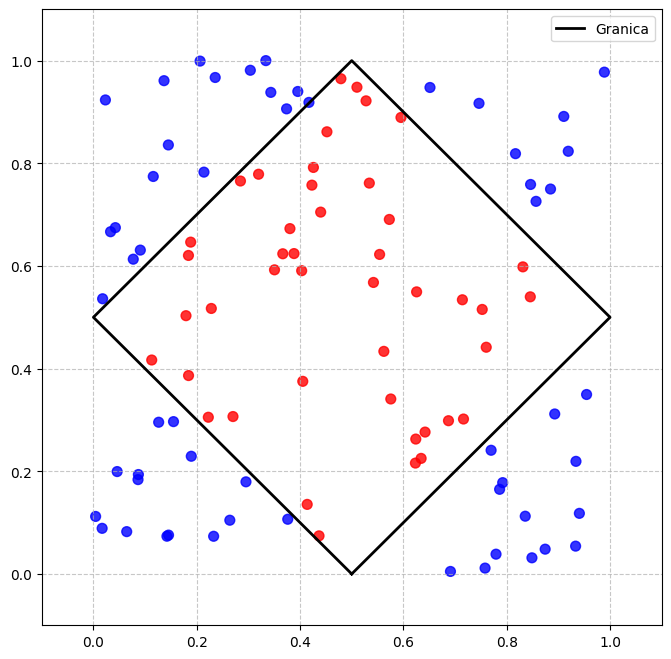

In [5]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.grid(visible=True, linestyle='--', alpha=0.7)
ax.scatter(x_coords, y_coords, c=point_colors, s=50, alpha=0.8)
romb_x = [0.5, 1, 0.5, 0, 0.5]
romb_y = [0, 0.5, 1, 0.5, 0]
ax.plot(romb_x, romb_y, 'k-', lw=2, label='Border')
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
ax.legend()
plt.show()

In [6]:
class PointClassifier:
    def __init__(self, N=100):
        self.N = N  # Number of points
        self.W1 = np.array([
            [1, 1, -0.5],
            [1, 1, -1.5],
            [-1, 1, -0.5],
            [-1, 1, 0.5]
        ])
        self.W2 = np.array([1, -1, -1, 1, -1])
        self.x_coords = np.random.uniform(0, 1, self.N)
        self.y_coords = np.random.uniform(0, 1, self.N)
        self.point_colors = []

    def step_function(self, value):
        return 1 if value >= 0 else 0

    def classify_point(self, coord_x, coord_y):
        point = np.array([coord_x, coord_y, 1])
        W1_out = np.dot(self.W1, point)
        activation_outputs = np.array([self.step_function(out) for out in W1_out] + [1])
        return 'blue' if np.dot(self.W2, activation_outputs) == 0 else 'red'

    def classify_points(self):
        self.point_colors = [
            self.classify_point(self.x_coords[i], self.y_coords[i]) for i in range(self.N)
        ]

    def plot_points(self):
        self.classify_points()

        fig, ax = plt.subplots(figsize=(8, 8))
        ax.grid(visible=True, linestyle='--', alpha=0.7)
        ax.scatter(self.x_coords, self.y_coords, c=self.point_colors, s=50, alpha=0.8)

        # New boundary shape: square
        square_x = [0.25, 0.75, 0.75, 0.25, 0.25]
        square_y = [0.25, 0.25, 0.75, 0.75, 0.25]
        ax.plot(square_x, square_y, 'k-', lw=2, label='Boundary')

        ax.set_xlim(-0.1, 1.1)
        ax.set_ylim(-0.1, 1.1)
        ax.legend()
        plt.show()

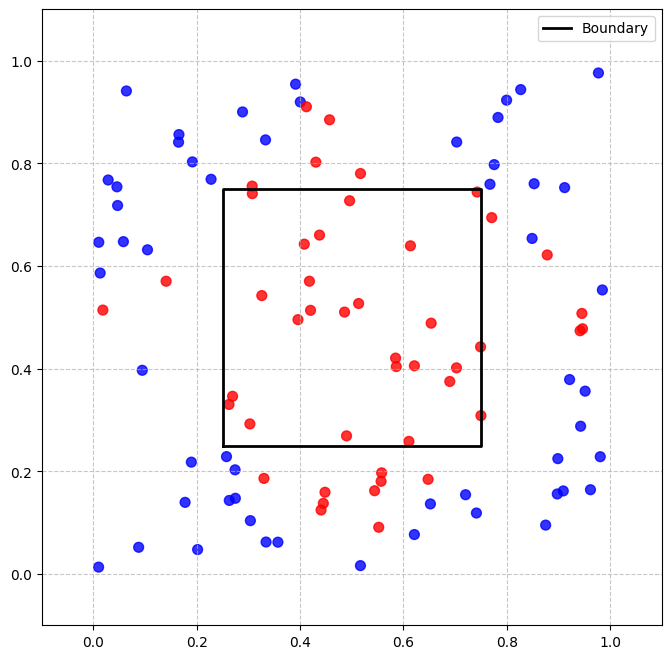

In [7]:
classifier = PointClassifier(N=100)
classifier.plot_points()
